# Coursework 2: Generating and Benchmarking of Health Data

## Problem solving and Scalability

PWD Coursework 2
Farah Adam
MSc Data Science Part-Time

The goal of this coursework is to make you apply the concepts and general methods seen in class and understand the scalability of your code. This assignment requires you to upload a short Python source code and an essay/technical annex that describes i) your analysis of the problems described below, ii) your algorithmic solution and the Python code for it and iii) the scalability analysis of your code, tested against random instances of the problem. Work is organized in phases, as described below.

#### Phase 1: MyHealthcare device: Vital signs simulator

MyHealthcare device is a wearable device for collecting vital sign data. Develop a Python function to simulate the MyHealthcare device that generates data for “n” vital sign records (e.g. 1000, 2000 etc.) of a person. The data should be generated according to the rules as presented in the following table. Measures that are out of the normal range are considered abnormal e.g. for temperature normal values are: 37 and 38 and abnormal values are 36 and 39.

In [ ]:
# Phase 1: MyHealthcare device: Vital Signs simulator

import pandas as pd
import numpy as np
import random
random.seed(404)


n = 1000

def myHealthcare():
    random.seed(404)
    
    temp = np.random.randint(36, 40, size= n)  
    hr = np.random.randint(55, 101, size = n)
    pulse = np.random.randint(55, 101, size = n)
    bloodpr = np.random.randint(120, 122, size = n)
    resrate = np.random.randint(11, 18, size = n)
    oxsat = np.random.randint(93, 101, size = n)
    ph = np.random.uniform(7.1, 7.6, size = n)
    
    data = {'Temp': temp, 'hr':hr, 'pulse':pulse, 'bloodpr':bloodpr, 'resrate':resrate, 'oxsat':oxsat, 'ph':ph}
    return data
    
# Data to use
data = myHealthcare()

# Data to use 
data1 = myHealthcare()

df = pd.DataFrame(data)

# Name the index ts
df.index.name = 'ts' 

# Rounding the ph values to only one number after the decimal
df.round(1)

,Temp,hr,pulse,bloodpr,resrate,oxsat,ph
ts,,,,,,,
0,36,55,68,121,17,95,7.5
1,38,98,97,120,15,99,7.1
2,37,63,67,121,17,100,7.1
3,38,97,83,120,17,97,7.5
4,36,73,94,121,17,100,7.6
...,...,...,...,...,...,...,...
995,37,77,90,120,12,100,7.4
996,36,67,70,121,14,97,7.4
997,37,67,68,121,12,93,7.3


In [ ]:
# Different ways to print out that dataset
#data
#df
#df.head()
#print(df.round(1))
#df.round(1)
#df.round(1).head
#myHealthcare()
#df.loc[:,'pulse'] # This only prints out the pulse column with ts
#df['pulse'] # This only prints out the pulse column with ts
#data1

#### Phase 2: Run analytics

Develop a Python function for each of the following analytics:

#####  a) Find abnormal values for pulse or blood pressure.
Select a small sample e.g. 50 records and count the instances where a vital sign was out of the normal range for a selected value. Return selected values for each timestamp. Example output for pulse with 3 abnormal values could be [pulse, 3, [[105,56], [109,57], [125,59]]] or {“ abnormal_pulse_count”: 3, “abnormal_values”: [[105,56], [109,57], [125,59]]}, where [105,56] is [timestamp,value]. Feel free to create your own data structure.

##### b) Present a frequency histogram of pulse rates.
Select a small sample e.g. 50 records, find the frequency for pulse rate values. Example output could be: [[55,2],[56,6],[57,4],[59,12],…]

##### c) Plot the results for 2a and 2b and briefly discuss your observations. What is the complexity of your algorithm?
Notes: Present diagrams and discussions in the report. Name the functions as abnormalSignAnalytics(…), frequencyAnalytics(…).

In [ ]:
#Phase 2: Run analytics

# a)Find abnormal value for Blood Pressure, abnormal value =121, normal value = 120
## SOLUTION 1: Using Linear Search

# Define abnormalSignanalytics() function using Linear Search Algorithm
def abnormalSignAnalytics():
    # select sample size of 50
    n = 50
    random.seed(404)
    # Initializing variables, abnormalbloodpr_list_ts will contain the timestamp list
    abnormalbloodpr_list_ts = []
    abnormalbloodpr_list = []
    bloodPressureList = data.get('bloodpr')
    for i in range (n):
        if bloodPressureList[i] == 121:
            abnormalbloodpr_list_ts.append(i)
    for ts in abnormalbloodpr_list_ts:
        abnormalbloodpr_list.append(bloodPressureList[ts])   
    # results_tuples will return a tuple of the abnormal values accompanied by their associated timestamp 
    # in the format (ts, abnormal result of 21) using list comprehension
    results_tuples = [x for x in zip(abnormalbloodpr_list_ts, abnormalbloodpr_list)]
    
    # Using dictionary comprehension to return the final result in the format requested
    return {'abnormal_blood_pressure_count': len(abnormalbloodpr_list_ts),'abnormal_values': results_tuples}
abnormalSignAnalytics()

# Calculating the runtime of the abnormalSignAnalytics() function 
%timeit abnormalSignAnalytics()

10000 loops, best of 3: 31 µs per loop


In [ ]:
abnormalSignAnalytics()

{'abnormal_blood_pressure_count': 24,
 'abnormal_values': [(0, 121),
  (2, 121),
  (4, 121),
  (5, 121),
  (7, 121),
  (10, 121),
  (14, 121),
  (16, 121),
  (17, 121),
  (18, 121),
  (23, 121),
  (24, 121),
  (26, 121),
  (27, 121),
  (31, 121),
  (32, 121),
  (33, 121),
  (34, 121),
  (35, 121),
  (40, 121),
  (41, 121),
  (45, 121),
  (46, 121),
  (49, 121)]}

In [ ]:
#Phase 2: Run analytics

# a)Find abnormal value for Blood Pressure, abnormal value =121, normal value = 120
## SOLUTION 2: Filtering out the value 121 from the bloodpr colum in the dataframe data/ df.round(1), 
# using indexing for filtering (python in-build)

data= myHealthcare()
def abnormalSignAnalytics2():
    random.seed(404)
    for i in range (50):
        data = df.round(1)
        results = data[data['bloodpr']==121]
        return results
abnormalSignAnalytics2()

,Temp,hr,pulse,bloodpr,resrate,oxsat,ph
ts,,,,,,,
0,36,55,68,121,17,95,7.5
2,37,63,67,121,17,100,7.1
4,36,73,94,121,17,100,7.6
5,36,98,80,121,11,96,7.1
7,37,91,82,121,15,95,7.2
...,...,...,...,...,...,...,...
990,39,57,66,121,16,94,7.5
993,38,75,84,121,15,95,7.4
994,36,70,67,121,12,94,7.5


In [ ]:
%timeit abnormalSignAnalytics2()

The slowest run took 4.22 times longer than the fastest. This could mean that an intermediate result is being cached.
100 loops, best of 3: 2.17 ms per loop


In [ ]:
## Phase 2: Run Analytics

# b)Present frequency histogram of pulse rates.
# SOLUTION 1: Linear Search for frequencyAnalytics() function
import collections

data = df.round(1)
n = 50

def frequencyAnalytics():
    random.seed(404)
    pulse = data.get('pulse')
    pulseFrequency = collections.Counter(pulse)
    for i in range(n):
        return pulseFrequency
    
frequencyAnalytics()

Counter({55: 27,
         56: 16,
         57: 26,
         58: 17,
         59: 20,
         60: 20,
         61: 36,
         62: 22,
         63: 15,
         64: 26,
         65: 27,
         66: 25,
         67: 24,
         68: 21,
         69: 23,
         70: 22,
         71: 19,
         72: 22,
         73: 16,
         74: 18,
         75: 23,
         76: 20,
         77: 23,
         78: 26,
         79: 32,
         80: 21,
         81: 29,
         82: 28,
         83: 23,
         84: 23,
         85: 17,
         86: 18,
         87: 13,
         88: 19,
         89: 13,
         90: 21,
         91: 21,
         92: 16,
         93: 22,
         94: 34,
         95: 16,
         96: 22,
         97: 20,
         98: 24,
         99: 17,
         100: 17})

In [ ]:
%timeit frequencyAnalytics()

138 µs ± 6.89 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
## Phase 2: Run Analytics

# b)Present frequency histogram of pulse rates.
# SOLUTION 2: Using in-build python function
data = df.round(1)
data = data.get('pulse')
def frequencyAnalytics2():
    return data.sample(n=50)   
frequencyAnalytics2()


ts
532    93
89     83
19     76
407    76
594    64
766    79
181    66
44     75
572    94
917    70
949    70
447    73
802    94
629    73
40     77
425    78
92     82
960    79
399    71
94     98
844    60
155    60
862    66
458    82
921    85
755    59
718    89
365    82
466    57
68     56
613    97
528    61
294    68
883    82
959    55
107    85
117    75
525    79
571    59
202    85
314    76
714    62
743    61
236    65
276    95
559    57
587    64
988    61
422    66
223    76
Name: pulse, dtype: int64

In [ ]:
%timeit frequencyAnalytics2()

The slowest run took 10.27 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 90.5 µs per loop


In [ ]:
## Phase 2: Run Analytics
# c) Plot results for 2a and 2b
import matplotlib.pyplot as plt

# Plot for 2a: abnormalAnalytics() and abnormalAnalytics2() functions
a_plot = abnormalSignAnalytics()
pd.DataFrame(a_plot, columns= ['pulse']).plot.hist(bins= 10)
plt.show()

TypeError: 'NoneType' object is not subscriptable

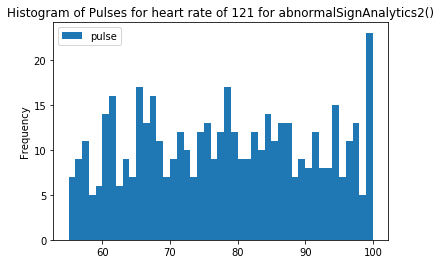

In [ ]:
a_plot2 = abnormalSignAnalytics2()
pd.DataFrame(a_plot2, columns= ['pulse']).plot.hist(bins= 45, title = 'Histogram of Pulses for heart rate of 121 for abnormalSignAnalytics2()')
plt.show()

In [ ]:
# Plot for 2b: frequencyAnalytics() function
a_freq = frequencyAnalytics()
pd.DataFrame(a_freq, columns= ['bloodpr', 'temp']).plot.hist(bins= 10)
plt.show()

TypeError: Empty 'DataFrame': no numeric data to plot

In [ ]:
# Plot for 2b: frequencyAnalytics2() function
a_freq2 = frequencyAnalytics2()
pd.DataFrame(a_freq2, columns= ['bloodpr', 'temp']).plot.hist(bins= 10)
plt.show()

TypeError: Empty 'DataFrame': no numeric data to plot

#### Phase 3: Search for heart rates using the HealthAnalyzer.

Develop a function called HealthAnalyzer. HealthAnalyzer provides a query mechanism to search for a particular sign value, for example it could search for records where the pulse value is 56.

##### a) Design an algorithm to search for a particular pulse rate value (e.g. 56), the algorithm should return a multidimensional list with all the records associated with this value (ts, temp, hr, pulse, bloodpr, resrate, oxsat). Keep in mind that a value might exist more than 1 time. For example, when searching for value 56, the following 3 records are selected.
[121, 37, 61, 56, 120, 11, 95, 7.3],
[126, 38, 62, 56, 120, 11, 95, 7.3],
[131, 37, 62, 56, 120, 11, 94, 7.2]
For this example, the output could be a list such as: [ [121, 37, 61, 56, 120, 11, 95, 7.3], [126, 38, 62, 56, 120, 11, 95, 7.3], [131, 37, 62, 56, 120, 11, 94, 7.2]].

##### b) What is the complexity of your solution?

##### c) Plot the heart rate values for records having pulse rate 56.
Notes: Present diagrams and discussions in the report. Name the function: healthAnalyzer (…)


In [ ]:
## Phase 3: Search for heart rates using the HealthAnalyzer
# a) Search for a particular pulse rate of 56

## SOLUTION 1: Using a build in python function
def healthAnalyzer():
    random.seed(404)
    data = df.round(1)
    return data[data.pulse==56]
healthAnalyzer()

,Temp,hr,pulse,bloodpr,resrate,oxsat,ph
ts,,,,,,,
9,37,73,56,121,13,95,7.3
144,37,56,56,120,15,95,7.5
177,36,80,56,121,12,93,7.4
187,37,93,56,121,12,98,7.3
294,36,97,56,121,12,97,7.2
300,36,79,56,120,17,97,7.5
394,37,92,56,120,14,100,7.2
400,38,89,56,121,13,96,7.4
421,36,72,56,120,12,100,7.5


In [ ]:
%timeit healthAnalyzer()

2.34 ms ± 234 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
## Phase 3: Search for heart rates using the HealthAnalyzer
# a) Search for a particular pulse rate of 56
## SOLUTION 2, Using in build python functions
def healthAnalyzer2():
    random.seed(404)
    data = df.round(1)
    return data[data['pulse']==56]
healthAnalyzer2()

,Temp,hr,pulse,bloodpr,resrate,oxsat,ph
ts,,,,,,,
9,37,73,56,121,13,95,7.3
144,37,56,56,120,15,95,7.5
177,36,80,56,121,12,93,7.4
187,37,93,56,121,12,98,7.3
294,36,97,56,121,12,97,7.2
300,36,79,56,120,17,97,7.5
394,37,92,56,120,14,100,7.2
400,38,89,56,121,13,96,7.4
421,36,72,56,120,12,100,7.5


In [ ]:
%timeit healthAnalyzer2()

2.2 ms ± 195 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
## Phase 3: Search for heart rates using the HealthAnalyzer
# a) Search for a particular pulse rate of 56
## SOLUTION 3: Linear Search

#tempList = data1.get('temp')
heartRateList = data1.get('hr')
pulseList = data1.get('pulse')
#bloodprList = data1.get('bloodpr')
#respList = data1.get('resrate')
#oxygenList = data1.get('oxsat')
#pHList = data1.get('ph')
def healthAnalyzer3():
    random.seed(404)
    pulse_index_56 = []
    for index in range (len(pulseList)):
        pulse = pulseList[index]
        heartRate= heartRateList[index]
        #temp = tempList[index]
        #bloodpr = bloodprList[index]
        #resp = respList[index]
        #oxygen = oxygenList[index]
        #pH = pHList[index]
        if (pulse == 56):
            pulse_index_56.append([pulse,heartRate])
    return pulse_index_56    

In [ ]:
%timeit healthAnalyzer3()

620 µs ± 34.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
healthAnalyzer3()

[[56, 64],
 [56, 91],
 [56, 76],
 [56, 100],
 [56, 75],
 [56, 65],
 [56, 69],
 [56, 86],
 [56, 88],
 [56, 87],
 [56, 79],
 [56, 89],
 [56, 69],
 [56, 56],
 [56, 71],
 [56, 55],
 [56, 86],
 [56, 58],
 [56, 80],
 [56, 59],
 [56, 78],
 [56, 92],
 [56, 73],
 [56, 79]]

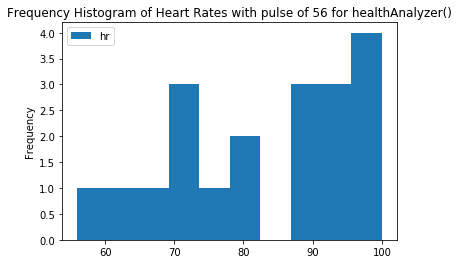

In [ ]:
## c) Plot the heart rate values for records having pulse rate 56


import matplotlib.pyplot as plt

pulseList = data1.get('pulse')
heartRateList = data1.get('hr')

def frequencyAnalytics():
    random.seed(404)
    pulse_index_56 = []
    for index in range (len(pulseList)):
        pulse = pulseList[index]
        heartRate = heartRateList[index]
        if (pulse == 56):
            pulse_index_56.append([pulse,heartRate])
    return pulse_index_56

a = healthAnalyzer()
pd.DataFrame(a, columns= ['hr']).plot.hist(bins= 10, title = 'Frequency Histogram of Heart Rates with pulse of 56 for healthAnalyzer()' )

plt.show()

#### Phase 4: Testing scalability of your algorithm
Benchmark the MyHealthData application simulating n = 1000, 2500, 5000, 7500 and 10000 records from phase 1 (MyHealthcare device).

##### a) Measure the running time and plot the results for different n values.

##### b) Present diagrams and discussions in the report.
Notes: Name the function: benchmarking(myHealthcare(…))

In [ ]:
# Benchmark the MyHealthData application simulating n = 1000, 2500, 5000, 7500 and 10000 records 
# from phase 1 (MyHealthcare device).
# a) Measure the running time and plot the results for different n values.

n = 1000
def benchmark(myHealthcare):
    for i in range (n):
        result = %timeit myHealthcare()
        return result
benchmark(myHealthcare)

84.3 µs ± 1.35 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


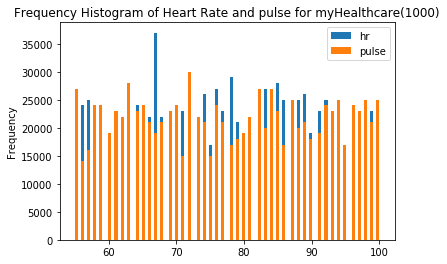

In [ ]:
# Plotting myHealthcare() for n =1000
n= 1000
%matplotlib inline
import matplotlib.pyplot as plt
pulseList = data1.get('pulse')
heartRateList = data1.get('hr')

def benchmark(myHealthcare):
    pulse_index= []
    for i in range (n):
        pulse = pulseList[i]
        heartRate = heartRateList[i]
        for i in range (n):
            pulse_index.append([pulse,heartRate])
    return pulse_index

a1000 = benchmark(myHealthcare)
pd.DataFrame(a1000, columns= ['hr', 'pulse']).plot.hist(bins= 100, title = 'Frequency Histogram of Heart Rate and pulse for myHealthcare(1000)')
plt.show()

In [ ]:
n = 2500
def benchmark(myHealthcare):
    for i in range (n):
        result = %timeit myHealthcare()
        return result
benchmark(myHealthcare)

175 µs ± 4.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
# Plotting myHealthcare() for n =2500
# n= 2500 fails with following error: IndexError: index 2000 is out of bounds for axis 0 with size 1000

a2500 = benchmark(myHealthcare)
pd.DataFrame(a2500, columns= ['heartRate', 'pulse']).plot.hist(x='heartRate', y='pulse', bins= 200)

plt.show()

IndexError: index 1000 is out of bounds for axis 0 with size 1000

In [ ]:
n = 5000
benchmark(myHealthcare)

321 µs ± 2.91 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
# Plotting myHealthcare() for n = 5000

In [ ]:
n = 7500
benchmark(myHealthcare)

498 µs ± 19.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
# plotting myHealthcare() for n =7500

In [ ]:
n = 10000
benchmark(myHealthcare)

649 µs ± 30.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
# Plotting myHealthcare() for n = 10000

In [ ]:
for n in range (2000):
    print(df.round(1))